In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, interpolate, fft

1024


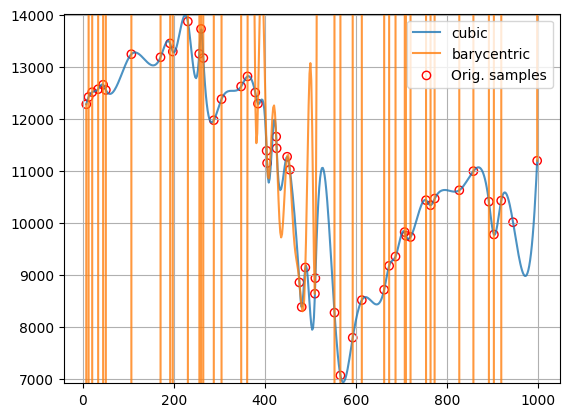

In [5]:
rng = np.random.default_rng()

dow_data = np.loadtxt("dow.txt")
print(len(dow_data))

num_points = 51
idx_choice = rng.choice(range(len(dow_data)), size = num_points, replace = False)
subsample = dow_data[idx_choice]

min_y, max_y = min(subsample), max(subsample)

min_x, max_x = min(idx_choice), max(idx_choice)
approx_x = np.linspace(min_x, max_x, 10*num_points)

intrp_methods = ['cubic']

fig, ax = plt.subplots()

for meth in intrp_methods:
    interp_func = interpolate.interp1d(idx_choice, subsample, kind=meth)
    approx_x = np.linspace(min(idx_choice), max(idx_choice), 10*num_points)
    approx_y = interp_func(approx_x)
    ax.plot(approx_x, approx_y, label=meth, alpha=0.8)


interp_func = interpolate.BarycentricInterpolator(idx_choice, subsample)
approx_x = np.linspace(min(idx_choice), max(idx_choice), 10*num_points)
approx_y = interp_func(approx_x)
ax.plot(approx_x, approx_y, label= "barycentric", alpha=0.8)

ax.scatter(idx_choice, subsample, facecolors='none', edgecolor='red', label="Orig. samples")
ax.set_ylim(min_y - 150, max_y + 150)
ax.grid(True)
ax.legend(loc=1)